In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [2]:
data = pd.read_csv("../../Data/wa/Data gede masked olahan.csv", parse_dates=['Date','Last Update Time'])
df = data.copy()
df.head()

C:\Users\Jayy\AppData\Local\Temp\ipykernel_13496\1192523660.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../../Data/wa/Data gede masked olahan.csv", parse_dates=['Date','Last Update Time'])


,Email User,Nomor Telepon Tujuan,Status,Date,Last Update Time,jam last update,tanggal last update,hari last update,bulan last update,isWeekend last update,jam,tanggal,hari,bulan,Nomor Telepon Tujuan Prefix,provider,selisih
0,Email user 1,0821xxxxxxxx,read,2023-02-14 11:13:00,2023-02-14 11:14:00,11,14,Selasa,2,0,11,14,Selasa,2,0821,Telkomsel,0 days 00:01:00
1,Email user 1,0812xxxxxxxx,read,2023-02-14 11:13:00,2023-02-14 11:17:00,11,14,Selasa,2,0,11,14,Selasa,2,0812,Telkomsel,0 days 00:04:00
2,Email user 1,0838xxxxxxxx,read,2023-02-14 11:13:00,2023-02-14 11:15:00,11,14,Selasa,2,0,11,14,Selasa,2,0838,XL,0 days 00:02:00
3,Email user 1,0858xxxxxxxx,read,2023-02-14 11:13:00,2023-02-14 11:28:00,11,14,Selasa,2,0,11,14,Selasa,2,0858,Indosat,0 days 00:15:00
4,Email user 1,0858xxxxxxxx,delivered,2023-02-14 11:13:00,2023-02-14 11:13:00,11,14,Selasa,2,0,11,14,Selasa,2,0858,Indosat,0 days 00:00:00


In [3]:
df.Status.value_counts()

read         7048484
rejected     2907190
submitted    2728794
delivered    2257911
failed       1121572
in_queue         953
Name: Status, dtype: int64

In [4]:
df['isRead'] = (df['Status'] == 'read').astype(int)
df['isRead'].value_counts()

0    9016420
1    7048484
Name: isRead, dtype: int64

In [5]:
df[(df['isRead'] == 1) | (df['isRead'] == 0)]

,Email User,Nomor Telepon Tujuan,Status,Date,Last Update Time,jam last update,tanggal last update,hari last update,bulan last update,isWeekend last update,jam,tanggal,hari,bulan,Nomor Telepon Tujuan Prefix,provider,selisih,isRead
0,Email user 1,0821xxxxxxxx,read,2023-02-14 11:13:00,2023-02-14 11:14:00,11,14,Selasa,2,0,11,14,Selasa,2,0821,Telkomsel,0 days 00:01:00,1
1,Email user 1,0812xxxxxxxx,read,2023-02-14 11:13:00,2023-02-14 11:17:00,11,14,Selasa,2,0,11,14,Selasa,2,0812,Telkomsel,0 days 00:04:00,1
2,Email user 1,0838xxxxxxxx,read,2023-02-14 11:13:00,2023-02-14 11:15:00,11,14,Selasa,2,0,11,14,Selasa,2,0838,XL,0 days 00:02:00,1
3,Email user 1,0858xxxxxxxx,read,2023-02-14 11:13:00,2023-02-14 11:28:00,11,14,Selasa,2,0,11,14,Selasa,2,0858,Indosat,0 days 00:15:00,1
4,Email user 1,0858xxxxxxxx,delivered,2023-02-14 11:13:00,2023-02-14 11:13:00,11,14,Selasa,2,0,11,14,Selasa,2,0858,Indosat,0 days 00:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16064899,Email user 238,0811xxxxxxxx,submitted,2023-03-28 09:06:00,2023-05-10 13:38:00,13,10,Rabu,5,0,9,28,Selasa,3,0811,Telkomsel,43 days 04:32:00,0
16064900,Email user 238,0813xxxxxxxx,submitted,2023-03-28 09:06:00,2023-05-10 13:38:00,13,10,Rabu,5,0,9,28,Selasa,3,0813,Telkomsel,43 days 04:32:00,0
16064901,Email user 238,0812xxxxxxxx,submitted,2023-03-28 08:57:00,2023-05-10 13:38:00,13,10,Rabu,5,0,8,28,Selasa,3,0812,Telkomsel,43 days 04:41:00,0
16064902,Email user 238,91902xxxxxxxx,submitted,2023-03-28 09:06:00,2023-05-10 13:38:00,13,10,Rabu,5,0,9,28,Selasa,3,9190,other,43 days 04:32:00,0


In [6]:
isRead = df[df['isRead'] == 1]

In [7]:
timeSeries = isRead.groupby(['Last Update Time']).size().reset_index(name='counts')
timeSeries['Last Update Time'] = pd.to_datetime(timeSeries['Last Update Time'])
timeSeries = timeSeries.set_index('Last Update Time')
timeSeries = timeSeries.resample('D').sum()
timeSeries

,counts
Last Update Time,
2023-01-01,18884
2023-01-02,40867
2023-01-03,47844
2023-01-04,28115
2023-01-05,39920
...,...
2023-05-05,5
2023-05-06,1
2023-05-07,7


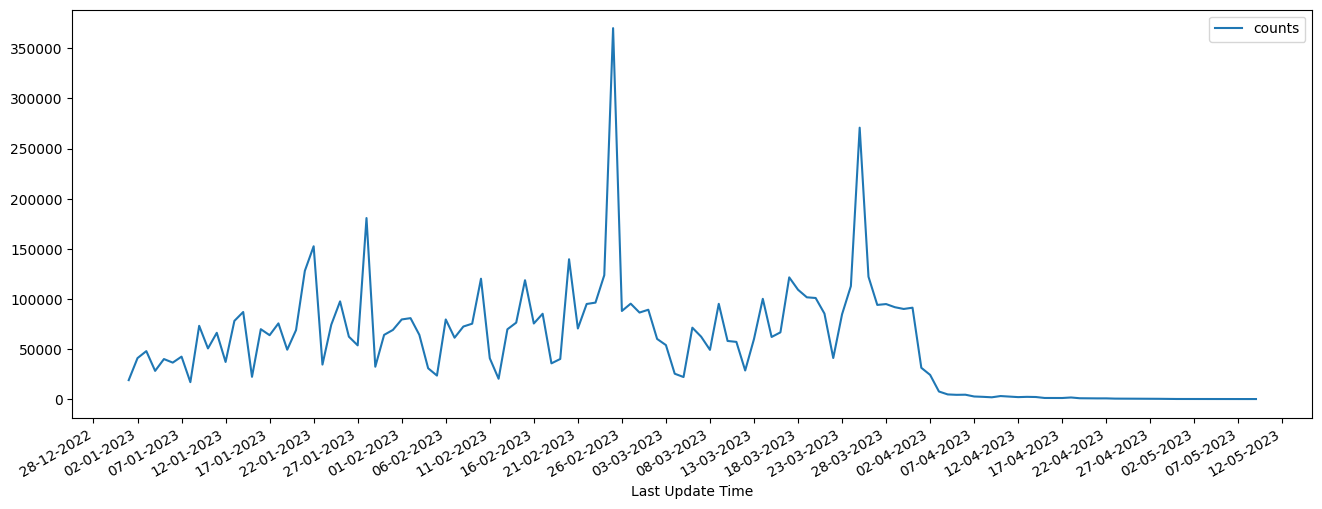

In [8]:
import matplotlib
import matplotlib.dates as mdates
fig,ax = plt.subplots()
timeSeries.plot(figsize=(16, 6), x_compat=True, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%m-%Y", tz=None))


In [9]:
timeSeriesBlasting = data.groupby(['Date']).size().reset_index(name='counts')
timeSeriesBlasting['Date'] = pd.to_datetime(timeSeriesBlasting['Date'])
timeSeriesBlasting = timeSeriesBlasting.set_index('Date')
timeSeriesBlasting = timeSeriesBlasting.resample('D').sum()
timeSeriesBlasting

,counts
Date,
2023-01-01,45235
2023-01-02,103463
2023-01-03,100692
2023-01-04,58901
2023-01-05,81187
...,...
2023-03-29,185087
2023-03-30,191422
2023-03-31,178464


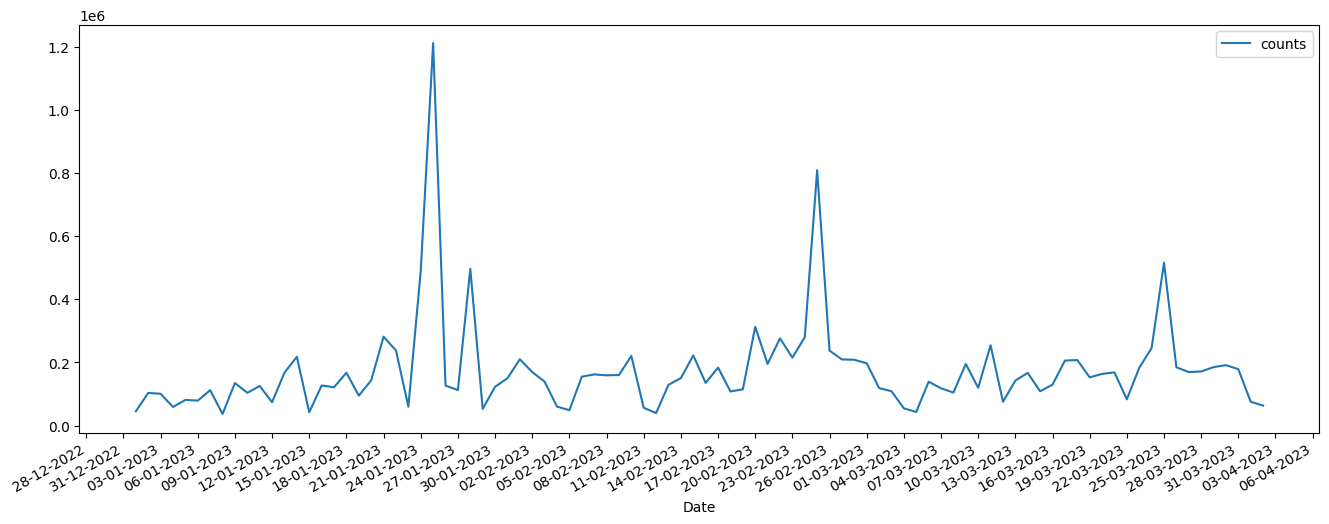

In [10]:
import matplotlib
import matplotlib.dates as mdates
fig,ax = plt.subplots()
timeSeriesBlasting.plot(figsize=(16, 6), x_compat=True, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%m-%Y", tz=None))

In [11]:
# convert time diff to minutes
df['selisih'] = (df['Last Update Time'] - df['Date']).dt.seconds/60
df['selisih'].value_counts()

0.0      5925290
1.0      1087194
2.0       457022
3.0       341328
4.0       282208
          ...   
811.0        592
827.0        589
781.0        583
782.0        580
778.0        569
Name: selisih, Length: 1440, dtype: int64

In [12]:
df.describe()

,jam last update,tanggal last update,bulan last update,isWeekend last update,jam,tanggal,bulan,selisih,isRead
count,1.606490e+07,1.606490e+07,1.606490e+07,1.606490e+07,1.606490e+07,1.606490e+07,1.606490e+07,1.606490e+07,1.606490e+07
mean,1.291275e+01,1.728453e+01,2.364345e+00,2.877637e-01,1.272506e+01,1.821433e+01,1.992577e+00,1.607031e+02,4.387505e-01
std,4.763277e+00,8.634573e+00,1.247549e+00,4.527204e-01,4.940960e+00,8.442155e+00,8.317599e-01,3.564993e+02,4.962343e-01
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+01,1.000000e+01,1.000000e+00,0.000000e+00,1.000000e+01,1.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00
50%,1.300000e+01,1.900000e+01,2.000000e+00,0.000000e+00,1.300000e+01,2.100000e+01,2.000000e+00,4.000000e+00,0.000000e+00
75%,1.600000e+01,2.500000e+01,3.000000e+00,1.000000e+00,1.600000e+01,2.500000e+01,3.000000e+00,8.200000e+01,1.000000e+00
max,2.300000e+01,3.100000e+01,5.000000e+00,1.000000e+00,2.300000e+01,3.100000e+01,4.000000e+00,1.439000e+03,1.000000e+00


In [13]:
df.groupby('Email User').mean().selisih.sort_values(ascending=True).head(10)

C:\Users\Jayy\AppData\Local\Temp\ipykernel_13496\14702023.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Email User').mean().selisih.sort_values(ascending=True).head(10)


Email User
Email user 20     0.000000
Email user 65     0.000000
Email user 190    0.000000
Email user 231    0.000000
Email user 229    0.000000
Email user 226    0.000000
Email user 201    0.000000
Email user 206    0.000000
Email user 208    0.000000
Email user 126    0.001205
Name: selisih, dtype: float64

In [14]:
df[df.columns] = df[df.columns].astype(object)
df.dtypes

Email User                     object
Nomor Telepon Tujuan           object
Status                         object
Date                           object
Last Update Time               object
jam last update                object
tanggal last update            object
hari last update               object
bulan last update              object
isWeekend last update          object
jam                            object
tanggal                        object
hari                           object
bulan                          object
Nomor Telepon Tujuan Prefix    object
provider                       object
selisih                        object
isRead                         object
dtype: object

In [15]:
df.describe()

,Email User,Nomor Telepon Tujuan,Status,Date,Last Update Time,jam last update,tanggal last update,hari last update,bulan last update,isWeekend last update,jam,tanggal,hari,bulan,Nomor Telepon Tujuan Prefix,provider,selisih,isRead
count,16064904,16064904,16064904,16064904,16064904,16064904,16064904,16064904,16064904,16064904,16064904,16064904,16064904,16064904,16064904,16064904,16064904.0,16064904
unique,238,2200,6,124174,146421,24,31,7,5,2,24,31,7,4,2003,7,1440.0,2
top,Email user 49,0812xxxxxxxx,read,2023-03-30 09:05:00,2023-05-04 14:08:00,12,25,Rabu,2,0,13,25,Sabtu,1,812,Telkomsel,0.0,0
freq,2535975,2741439,7048484,3669,117998,1816643,2317893,3944624,4776927,11442007,1471591,2535873,3248544,5478481,1479420,10038352,5925290.0,9016420


In [16]:
df['Status'].value_counts()

read         7048484
rejected     2907190
submitted    2728794
delivered    2257911
failed       1121572
in_queue         953
Name: Status, dtype: int64

In [17]:
df = df[df['Status'].isin(['read', 'delivered'])]

In [35]:
groupby = df.groupby(['bulan last update', 'hari last update', 'jam last update', 'provider', 'Status']).size().unstack().fillna(0)
groupby.reset_index(inplace=True)

In [36]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

scaller = MinMaxScaler()
groupby['total'] = groupby['read'] + groupby['delivered']
groupby['read_rate'] = groupby['read'] / (groupby['read'] + groupby['delivered'])

groupby['read scalled'] = scaller.fit_transform(groupby[['read']])
groupby['delivered scalled'] = scaller.fit_transform(groupby[['delivered']])
groupby['weighted'] = (groupby['delivered scalled'] * 0.1) + (groupby['read scalled'] * 0.9)

groupby

Status,bulan last update,hari last update,jam last update,provider,delivered,read,total,read_rate,read scalled,delivered scalled,weighted
0,1,Jumat,0,Axis,1.0,4.0,5.0,0.800000,0.000101,0.000050,0.000096
1,1,Jumat,0,Indosat,9.0,80.0,89.0,0.898876,0.002018,0.000449,0.001861
2,1,Jumat,0,Smartfren,1.0,21.0,22.0,0.954545,0.000530,0.000050,0.000482
3,1,Jumat,0,Telkomsel,46.0,354.0,400.0,0.885000,0.008931,0.002294,0.008267
4,1,Jumat,0,Tri,2.0,64.0,66.0,0.969697,0.001615,0.000100,0.001463
...,...,...,...,...,...,...,...,...,...,...,...
4569,5,Senin,17,Telkomsel,0.0,2.0,2.0,1.000000,0.000050,0.000000,0.000045
4570,5,Senin,18,Tri,0.0,1.0,1.0,1.000000,0.000025,0.000000,0.000023
4571,5,Senin,20,Indosat,0.0,1.0,1.0,1.000000,0.000025,0.000000,0.000023
4572,5,Senin,20,Telkomsel,0.0,8.0,8.0,1.000000,0.000202,0.000000,0.000182


In [37]:
groupby['rrw'] = (groupby['read_rate'] * 0.01) + (groupby['weighted'] * 0.99)

In [38]:
def is_weekend(groupby):
    
    if (
        groupby['hari last update'] == 'Sabtu' 
        or groupby['hari last update'] == 'Minggu'
        ):
        return 'Weekend'
    else:
        return 'Weekday'

groupby['is_weekend'] = groupby.apply(is_weekend, axis = 1)

In [39]:
def is_working_hour(groupby):
    if (
        groupby['jam last update'] >= 8 
        and groupby['jam last update'] <= 17
        and groupby['is_weekend'] == 'Weekday'
        ):
        return 'Working Hour'
    else:
        return 'Non Working Hour'

groupby['is_working_hour'] = groupby.apply(is_working_hour, axis = 1)

In [40]:
groupby

Status,bulan last update,hari last update,jam last update,provider,delivered,read,total,read_rate,read scalled,delivered scalled,weighted,rrw,is_weekend,is_working_hour
0,1,Jumat,0,Axis,1.0,4.0,5.0,0.800000,0.000101,0.000050,0.000096,0.008095,Weekday,Non Working Hour
1,1,Jumat,0,Indosat,9.0,80.0,89.0,0.898876,0.002018,0.000449,0.001861,0.010831,Weekday,Non Working Hour
2,1,Jumat,0,Smartfren,1.0,21.0,22.0,0.954545,0.000530,0.000050,0.000482,0.010022,Weekday,Non Working Hour
3,1,Jumat,0,Telkomsel,46.0,354.0,400.0,0.885000,0.008931,0.002294,0.008267,0.017034,Weekday,Non Working Hour
4,1,Jumat,0,Tri,2.0,64.0,66.0,0.969697,0.001615,0.000100,0.001463,0.011145,Weekday,Non Working Hour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4569,5,Senin,17,Telkomsel,0.0,2.0,2.0,1.000000,0.000050,0.000000,0.000045,0.010045,Weekday,Working Hour
4570,5,Senin,18,Tri,0.0,1.0,1.0,1.000000,0.000025,0.000000,0.000023,0.010022,Weekday,Non Working Hour
4571,5,Senin,20,Indosat,0.0,1.0,1.0,1.000000,0.000025,0.000000,0.000023,0.010022,Weekday,Non Working Hour
4572,5,Senin,20,Telkomsel,0.0,8.0,8.0,1.000000,0.000202,0.000000,0.000182,0.010180,Weekday,Non Working Hour


In [48]:
groupby[(groupby['hari last update'] == 'Senin')].sort_values(by=['rrw'], ascending=False).head(20)

Status,bulan last update,hari last update,jam last update,provider,delivered,read,total,read_rate,read scalled,delivered scalled,weighted,rrw,is_weekend,is_working_hour
2270,2,Senin,16,Telkomsel,11090.0,33360.0,44450.0,0.750506,0.841617,0.553007,0.812756,0.812133,Weekday,Working Hour
2263,2,Senin,15,Telkomsel,11153.0,31665.0,42818.0,0.739525,0.798855,0.556148,0.774584,0.774233,Weekday,Working Hour
2249,2,Senin,13,Telkomsel,11165.0,30057.0,41222.0,0.729149,0.758288,0.556747,0.738133,0.738044,Weekday,Working Hour
2256,2,Senin,14,Telkomsel,8327.0,30471.0,38798.0,0.785376,0.768732,0.415229,0.733382,0.733902,Weekday,Working Hour
2235,2,Senin,11,Telkomsel,11458.0,28589.0,40047.0,0.713886,0.721252,0.571357,0.706263,0.706339,Weekday,Working Hour
1079,1,Senin,11,Telkomsel,10182.0,27697.0,37879.0,0.731197,0.698749,0.507729,0.679647,0.680162,Weekday,Working Hour
3414,3,Senin,13,Telkomsel,11330.0,24285.0,35615.0,0.681876,0.612670,0.564975,0.607900,0.608640,Weekday,Working Hour
3400,3,Senin,11,Telkomsel,10358.0,24119.0,34477.0,0.699568,0.608482,0.516505,0.599284,0.600287,Weekday,Working Hour
2277,2,Senin,17,Telkomsel,6041.0,23907.0,29948.0,0.798284,0.603133,0.301237,0.572944,0.575197,Weekday,Working Hour
3407,3,Senin,12,Telkomsel,7618.0,21404.0,29022.0,0.737509,0.539987,0.379874,0.523976,0.526111,Weekday,Working Hour


In [45]:
groupby.sort_values(by=['rrw'], ascending=False).head(20)

Status,bulan last update,hari last update,jam last update,provider,delivered,read,total,read_rate,read scalled,delivered scalled,weighted,rrw,is_weekend,is_working_hour
2395,3,Jumat,10,Telkomsel,14826.0,39638.0,54464.0,0.727783,1.000000,0.739304,0.973930,0.971469,Weekday,Working Hour
941,1,Selasa,15,Telkomsel,20054.0,37087.0,57141.0,0.649044,0.935643,1.000000,0.942078,0.939148,Weekday,Working Hour
2591,3,Kamis,14,Telkomsel,13981.0,36367.0,50348.0,0.722313,0.917478,0.697168,0.895447,0.893716,Weekday,Working Hour
1760,2,Rabu,14,Telkomsel,11862.0,36413.0,48275.0,0.754283,0.918639,0.591503,0.885925,0.884609,Weekday,Working Hour
1925,2,Sabtu,14,Telkomsel,16756.0,34911.0,51667.0,0.675692,0.880746,0.835544,0.876226,0.874220,Weekend,Non Working Hour
2570,3,Kamis,11,Telkomsel,16744.0,34477.0,51221.0,0.673103,0.869797,0.834946,0.866312,0.864379,Weekday,Working Hour
1918,2,Sabtu,13,Telkomsel,15510.0,34406.0,49916.0,0.689278,0.868005,0.773412,0.858546,0.856853,Weekend,Non Working Hour
1753,2,Rabu,13,Telkomsel,15220.0,33828.0,49048.0,0.689692,0.853423,0.758951,0.843976,0.842433,Weekday,Working Hour
3249,3,Selasa,13,Telkomsel,15105.0,33738.0,48843.0,0.690744,0.851153,0.753216,0.841359,0.839853,Weekday,Working Hour
741,1,Sabtu,10,Telkomsel,17191.0,33027.0,50218.0,0.657673,0.833216,0.857235,0.835618,0.833838,Weekend,Non Working Hour


In [46]:
groupby.describe()

Status,bulan last update,jam last update,delivered,read,total,read_rate,read scalled,delivered scalled,weighted,rrw
count,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000
mean,2.487757,11.658942,493.640359,1540.989069,2034.629427,0.828576,0.038877,0.024616,0.037450,0.045362
std,1.135170,6.866474,1725.193714,4449.199420,6113.690456,0.148848,0.112246,0.086027,0.109238,0.107933
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000005,0.000005
25%,1.000000,6.000000,3.000000,29.000000,34.000000,0.766378,0.000732,0.000150,0.000678,0.010067
50%,2.000000,12.000000,29.000000,168.000000,205.000000,0.847091,0.004238,0.001446,0.004007,0.012378
75%,3.000000,18.000000,193.750000,911.500000,1120.000000,0.924895,0.022996,0.009661,0.021816,0.029776
max,5.000000,23.000000,20054.000000,39638.000000,57141.000000,1.000000,1.000000,1.000000,0.973930,0.971469


In [43]:
groupby.to_csv("../../data/data_olahan_groupby ada selisihnya 7.csv", index=False)